# Análisis de datos con Python

En esta clase veremos la herramienta de análisis de datos `pandas`. Esta herramienta es una librería que permite hacer análisis y limpieza de datos en Python. Está diseñada para trabajar con datos tabulares y heterogéneos. También es utilizada en conjunto con otras herramientas para hacer _Data Science_ como `NumPy`, `SciPy`, `matplotlib` y `scikit-learn`. El objetivo de esta clase/tutorial es tener nociones básicas de la librería `pandas` y conocer cómo esta puede hacer uso de un motor SQL.

### Outline

En esta clase vamos a ver:

- Tópicos básicos de la librería `Pandas`:
 - El tipo `Series`
 - El tipo `DataFrame`
 - Proyecciones y filtros en un `DataFrame`
 - Importar datos desde SQL
 - Resumen de los datos
 - Manejar nulos
 - Agregación
 - Índices jerárquicos
 - Joins
- Visualización rápida con `matplotlib`

### Requisitos

Para esta clase vamos a utilizar Python3 y algunas librerías externas. Las vamos a instalar utilizando pip:

```
pip3 install --upgrade jupyter matplotlib numpy pandas scipy
```

Para la parte de SQL necesitarán `psycopg2`

```
pip3 install psycopg2
```

Para comenzar con `pandas` estudiaremos los tipos `Series` y `DataFrame`. Partimos importando la librería:

In [3]:
import pandas as pd

### Series

Vamos a partir instanciando objetos de tipo `Series`. Estos objetos son como arreglos unidimensionales.

In [ ]:
obj = pd.Series([1, 3, -4, 7])
obj

Para un objeto de tipo `Series` podemos agregar un label a sus índices.

In [ ]:
obj = pd.Series([1, 3, -4, 7], index=['d', 'c', 'b', 'a'])
obj

In [ ]:
obj['c']

Podemos seleccionar varios elementos según el label de su índice.

In [ ]:
obj[['c', 'a']]

In [ ]:
obj[[0, 2]]

Podemos hacer filtros pasando un arreglo de _booleanos_:

In [ ]:
obj[obj > 2]

Recordemos lo que significaba la comparación `obj > 2` en `NumPy`. Esta comparación era una arreglo con el mismo largo que `obj` que tenía el valor `True` en todas las posiciones con valor mayor a 2.

In [ ]:
obj > 2

Por lo que en `obj[obj > 2]` se muestran sólo las filas en la que el arreglo anterior era `True`.

Finalmente, podemos crear un objeto `Series` a partir de un diccionario. Supongamos el siguiente diccionario de personas junto a su edad.

In [ ]:
people = {'Alice': 20, 'Bob': 17, 'Charles': 23, 'Dino': None}
people_series = pd.Series(people)
people_series

¿Qué pasa si queremos filtrar por ciertos nombres pero algunos no existen?

In [ ]:
# Esto va a arrojar error en el futuro.
people_series[['Bob', 'Dino', 'Edward']]

### DataFrame

Un objeto de tipo `DataFrame` representa una tabla, en que cada una de sus columnas representa un tipo. Vamos a construir una tabla a partir de un diccionario.

In [ ]:
reg_chile = {'name': ['Metropolitana', 'Valparaiso', 'Biobío', 'Maule', 'Araucanía', 'O\'Higgins'],
             'pop': [7112808, 1815902, 1538194, 1044950, 957224, 914555],
             'pib': [24850, 14510, 13281, 12695, 11064, 14840]}
frame = pd.DataFrame(reg_chile)
frame

Podemos usar la función `head` para tener sólo las 5 primeras columnas del Data Frame. En este caso no es mucho aporte, pero para un Data Frame más grande no puede servir para ver cómo vienen los datos.

In [ ]:
frame.head()

Podemos proyectar valores pasando el nombre de las columnas que deseamos dejar.

In [ ]:
frame[['name']]

In [ ]:
frame[['name', 'pop']]

Podemos seleccionar una determinada fila con la función `iloc`.

In [ ]:
frame.iloc[2]

Podemos utilizar la misma idea de filtros vista anteriormente. Por ejemplo, vamos a dejar sólamente las columnas con población mayor a 1.000.000.

In [ ]:
frame[frame['pop'] > 1000000]

Podemos hacer filtros con `&` para hacer un `AND`:

In [ ]:
frame[(frame['pop'] > 1000000) & (frame['pib'] < 20000)]

Y podemos usar `|` para hacer un `OR`:

In [ ]:
frame[(frame['name'] == 'Metropolitana') | (frame['name'] == 'Valparaiso')]

Existen muchas formas de crear y operar sobre un `DataFrame`. Puedes revisar la documentación para encontrar más.

### Orden sobre un Data Frame

Para ordenar un objeto `DataFrame` usamos la función `sort_values` (con ascending le indicamos orden ascendente o descendente):

In [ ]:
frame.sort_values(by='name', ascending=False)

Si necesitamos ordenar por más de una columna, podemos pasar un arreglo al argumento `by`.

### Describiendo los datos

La librería `pandas` tiene varias funciones que nos permiten obtener descripciones y resúmenes de los datos. Vamos a ver algunos ejemplos.

In [ ]:
frame.describe()

In [ ]:
frame.mean()

In [ ]:
frame.sum()

### Utilizando datos externos (opcional)

En `pandas` es posible importar datos en formato `.csv`, `.xlsx` entre otros. También es posible obtener los datos desde una consulta SQL. En este ejemplo vamos a suponer que existe la siguiente tabla en una base de datos PSQL:

```
Comunas(cod INT PRIMARY KEY, nombre VARCHAR(200), 
  provincia VARCHAR(200), region VARCHAR(200), 
  superficie FLOAT, poblacion INT, 
  densidad FLOAT, idh FLOAT);

```

En esta tabla se insertaron los datos del archivo `comunas.csv`, que puedes encontrar en el _Github_. Vamos a usar `psycopg2` para obtener los datos de esta tabla.

In [13]:
import psycopg2

conn = psycopg2.connect(database = "comunas", 
                        user = "root", 
                        password = "", 
                        host = "localhost", 
                        port = "3306")

cur = conn.cursor()
cur.execute('SELECT * FROM Comunas')

com_frame = pd.DataFrame(cur.fetchall())

conn.close()

OperationalError: connection to server at "localhost" (::1), port 3306 failed: received invalid response to SSL negotiation: X


# Importar archivos csv

Ahora vamos a importar el archivo pero como csv con la función `read_csv`.

In [14]:
com_frame = pd.read_csv("comunas.csv", header=None)

In [5]:
com_frame.head()

,0,1,2,3,4,5,6,7
0,15101,Arica,Arica,Arica y Parinacota,4799.4,210936,736.0,38.40
1,15102,Camarones,Arica,Arica y Parinacota,3927.0,679,0.3,751.00
2,15201,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.2,707.00
3,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.5,0.67
4,1101,Iquique,Iquique,Tarapacá,2242.1,184953,82.4,766.00


In [ ]:
com_frame.describe()

En esta tabla tenemos valores nulos. Vamos a buscarlos. Primero vamos a encontrar todas las filas que contengan algún nulo, para luego filtrar por ese arreglo.

In [ ]:
com_frame.isnull().any(axis=1)

In [ ]:
com_frame[com_frame.isnull().any(axis=1)]

`pandas` tiene métodos auxiliares para lidiar con datos faltantes. Uno es eliminar aquellas filas con la función `dropna()`

In [ ]:
com_cleaned = com_frame.dropna()
com_cleaned

O podemos tomar una opción menos radical, que es reemplazar los nulos por un valor en particular.

In [ ]:
com_frame = com_frame.fillna(0)
com_frame

Existen muchas otras opciones para limpiar los datos, pero no los veremos en este tutorial.

### Agregación

Vamos a ver unos ejemplos para agregar datos utilizando `pandas`. Lo primero que haremos será agregar el nombre de las columnas al Data Frame.

In [15]:
com_frame.columns = ['cod', 'nombre', 'prov', 'reg', 'sup', 'pobl', 'dens', 'idh']
com_frame

,cod,nombre,prov,reg,sup,pobl,dens,idh
0,15101,Arica,Arica,Arica y Parinacota,4799.4,210936,736.0,38.40
1,15102,Camarones,Arica,Arica y Parinacota,3927.0,679,0.3,751.00
2,15201,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.2,707.00
3,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.5,0.67
4,1101,Iquique,Iquique,Tarapacá,2242.1,184953,82.4,766.00
...,...,...,...,...,...,...,...,...
341,13601,Talagante,Talagante,Metropolitana de Santiago,126.0,78887,474.6,749.00
342,13602,El Monte,Talagante,Metropolitana de Santiago,118.0,32468,224.2,688.00
343,13603,Isla de Maipo,Talagante,Metropolitana de Santiago,189.0,33723,136.5,724.00
344,13604,Padre Hurtado,Talagante,Metropolitana de Santiago,80.8,50696,626.2,728.00


Ahora vamos a obtener la cantidad de habitantes por región.

In [16]:
com_frame['pobl'].groupby(com_frame['reg']).sum() # Ojo! esto retorna un objeto Series

reg
Antofagasta                             551627
Arica y Parinacota                      213816
Atacama                                 292054
Aysén del Gral. C. Ibáñez del Campo     106893
Biobío                                 1565839
Coquimbo                                714856
La Araucanía                            933537
Lib. Gral. Bernardo O'Higgins           903248
Los Lagos                               835829
Los Ríos                                380618
Magallanes y Antártica Chilena          158828
Maule                                  1073635
Metropolitana de Santiago              7090580
Tarapacá                                300021
Valparaíso                             1859312
Ñuble                                   460156
Name: pobl, dtype: int64

Podemos preguntar cuantos elementos hay por grupo. En este caso obtendríamos el número de comunas por región.

In [ ]:
com_frame['nombre'].groupby(com_frame['reg']).size() # Ojo! esto retorna un objeto Series

In [ ]:
com_frame['pobl'].groupby([com_frame['prov'], com_frame['reg']]).sum() # Ojo! esto retorna un objeto Series

En `pandas` se pueden hacer operaciones mucho más complejas, pero no veremos nada avanzado en esta ocasión. Puedes revisar la documentación para ver que más puedes hacer.

### Graficando los datos

Una de las ventajas de trabajar con `pandas` es que tenemos acceso rápido a herramientas de visualización. Una de ellas es la librería `matplotlib`. Vamos a ver un ejemplo rápido, haciendo un gráfico de barras de los habitantes por región.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

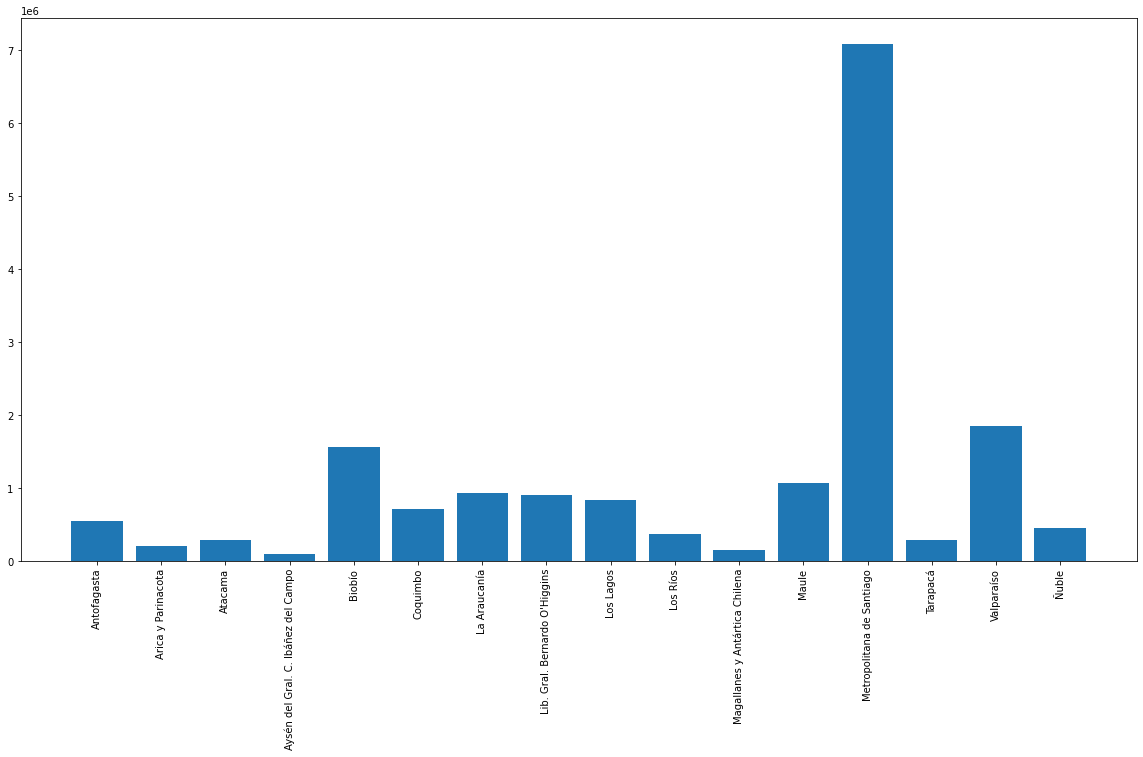

In [17]:
import matplotlib.pyplot as plt

# Ajustamos el tamaño del gráfico
plt.rcParams['figure.figsize'] = [20, 10]

pop_by_comune = com_frame['pobl'].groupby(com_frame['reg']).sum()
plt.bar(pop_by_comune.keys(), pop_by_comune)

# Ajustamos la rotación de los labels
plt.xticks(rotation=90)

plt

### Índices jerárquicos

Podemos instanciar objetos de la clase `DataFrame` en que los índices son jerárquicos. Veamos un ejemplo.

In [ ]:
data_multindex = pd.DataFrame(np.arange(12).reshape(4, 3), 
                    index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                    columns=['c1', 'c2', 'c3']) 
# La función reshape en este 
# caso distribuye los doce elementos 
# en una tabla de 4 filas y tres columnas

data_multindex

In [ ]:
data_multindex.iloc[0] # Esto nos arroja la primera fila.

Si queremos localizar por índice, usamos la función `loc`:

In [ ]:
data_multindex.loc['a']

In [ ]:
data_multindex.loc['a'].loc[2] # La función loc accede según el label del índice, no la posición

### Joins

Podemos hacer _joins_ sobre los Data Frames. Partamos con un ejemplo sencillo de dos objetos de tipo `DataFrame` que comparten el nombre de un atributo en el que se desea hacer _join_:

In [ ]:
import numpy as np

df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': np.arange(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd', 'a'],
                    'data2': np.arange(8, 12)})

pd.merge(df1, df2)

In [ ]:
df1

En la operación anterior, omitimos indicar explícitamente el atributo sobre el que estamos haciendo join. Para indicarlo hacemos lo siguiente:

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': np.arange(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd', 'a'],
                    'data2': np.arange(8, 12)})

pd.merge(df1, df2, on='key')

En el caso de que los atributos se llamen de distinta forma:

In [ ]:
df1 = pd.DataFrame({'key1': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': np.arange(7)})
df2 = pd.DataFrame({'key2': ['a', 'b', 'd', 'a'],
                    'data2': np.arange(8, 12)})

pd.merge(df1, df2, left_on='key1', right_on='key2')

En el caso de necesitar un _Outer Join_, podemos indicarlo con el argumento `how`. Puede ser `'left'`, `'right'` o `'outer'`. Veamos un ejemplo de _Left Outer Join_:

In [ ]:
df1 = pd.DataFrame({'key1': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': np.arange(7)})
df2 = pd.DataFrame({'key2': ['a', 'b', 'd', 'a'],
                    'data2': np.arange(8, 12)})

pd.merge(df1, df2, left_on='key1', right_on='key2', how='left')

En el caso de querer un _join_ por más de un argumento, puedo indicar una lista de atributos. También puedes renombrar atributos en el caso de que su nombre sea igual en ambos Data Frame y no quieras generar conflictos. Esto lo puedes hacer mediante el argumento `suffixes`. Para ver más puedes consultar la documentación.

Lo último que veremos es cómo hacer un _join_ utilizando una de los índices.

In [ ]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                    'value': np.arange(6)})
df2 = pd.DataFrame({'dvalue': [10, 20]}, index=['a', 'b'])

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.merge(df1, df2, left_on='key', right_index=True)

También puedes utilizar `merge` con índices jerárquicos. Puedes buscar más información en la documentación de `pandas`.